# Preparando o ambiente

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [17]:
np.random.seed(50)

# Carregando os dados

In [3]:
osorio = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/dias-tipicos/main/data/resumo_osorio_2019.csv')
del osorio['Unnamed: 0']
osorio.head()

,data,idr_manha,idr_tarde,idf_manha,idf_tarde,tmp_manha,tmp_tarde,ws_manha,ws_tarde,wind_electricity,pv_electricity
0,2019-01-01,0.172167,0.464000,0.165000,0.228833,25.703333,28.932833,3.764833,4.356000,1.079,4.991
1,2019-01-02,0.277833,0.568667,0.108667,0.176500,26.207667,31.356500,3.218500,1.680000,0.296,5.349
2,2019-01-03,0.004000,0.022833,0.131833,0.300333,26.989833,25.183833,2.278667,5.549167,1.371,2.306
3,2019-01-04,0.255500,0.547667,0.120333,0.187500,21.721000,24.702000,2.149167,3.014500,0.280,5.436
4,2019-01-05,0.223000,0.466500,0.134833,0.221167,21.689167,24.411333,3.372500,4.981167,1.256,5.193


# Manipulando e analisando os dados

In [4]:
X = osorio.drop(columns=['data'])
X.head()

,idr_manha,idr_tarde,idf_manha,idf_tarde,tmp_manha,tmp_tarde,ws_manha,ws_tarde,wind_electricity,pv_electricity
0,0.172167,0.464000,0.165000,0.228833,25.703333,28.932833,3.764833,4.356000,1.079,4.991
1,0.277833,0.568667,0.108667,0.176500,26.207667,31.356500,3.218500,1.680000,0.296,5.349
2,0.004000,0.022833,0.131833,0.300333,26.989833,25.183833,2.278667,5.549167,1.371,2.306
3,0.255500,0.547667,0.120333,0.187500,21.721000,24.702000,2.149167,3.014500,0.280,5.436
4,0.223000,0.466500,0.134833,0.221167,21.689167,24.411333,3.372500,4.981167,1.256,5.193


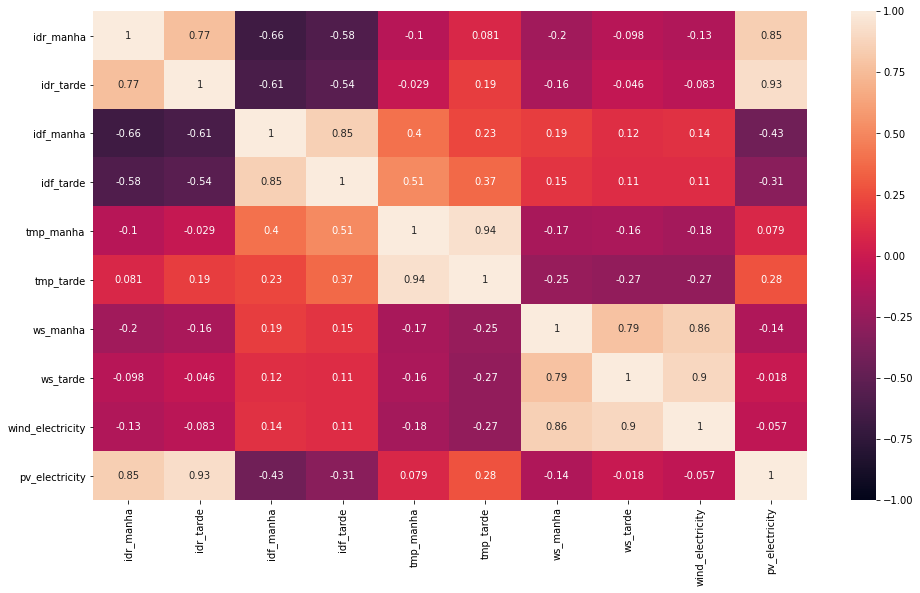

In [6]:
corr = X.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True);

# KMeans faixa de clusters

In [11]:
faixa_clusters = [2, 3, 7, 30, 60, 90]
valores_silhueta = []

for n in faixa_clusters:
  agrupador = KMeans(n_clusters=n)
  labels = agrupador.fit_predict(X)
  ss = silhouette_score(X, labels)
  ch = calinski_harabasz_score(X, labels)
  db = davies_bouldin_score(X, labels)
  values, counts = np.unique(labels, return_counts=True)
  print((n, ss, ch, db, counts))
  print('\n')

(2, 0.44118269945995053, 418.45772982967196, 0.8282869518219503, array([127, 238]))


(3, 0.37151812566895176, 424.46808234382354, 0.8924852983411861, array([ 86, 169, 110]))


(7, 0.28383970625522736, 319.2072770626916, 1.1094796376484164, array([33, 49, 63, 71, 15, 63, 71]))


(30, 0.21972507140006578, 171.3289080608992, 1.128946029914879, array([15, 21,  5, 16, 10,  9, 14,  4, 18,  8,  5, 13, 10, 16, 12, 19, 14,
       13, 12, 14, 19, 21, 10, 13,  7, 13, 17,  2, 10,  5]))


(60, 0.2001813702430365, 127.60141319744832, 1.1178925324730755, array([ 7,  8,  7,  7,  3,  4,  5, 12,  3,  4,  9,  7,  8,  7,  2,  3, 10,
        8,  8,  7,  6,  5,  5, 10,  4, 12,  7,  7,  7,  4,  5,  3,  6,  4,
        6, 11,  6,  3,  4, 13,  6,  6,  5,  4,  8, 11,  2,  6,  7,  3,  3,
        7,  7,  7,  2,  4, 11,  4,  4,  1]))


(90, 0.19230825374852523, 111.6089272002435, 0.9672486038435764, array([4, 5, 7, 1, 2, 3, 4, 4, 6, 4, 8, 4, 1, 5, 2, 4, 6, 7, 6, 4, 3, 9,
       3, 2, 3, 3, 6, 4, 1, 9, 1, 4, 5, 1, 

# KMeans dois clusters 

In [14]:
agrupador = KMeans(n_clusters=2)
labels = agrupador.fit_predict(X)
ss = silhouette_score(X, labels)
ch = calinski_harabasz_score(X, labels)
db = davies_bouldin_score(X, labels)
values, counts = np.unique(labels, return_counts=True)
print((2, ss, ch, db, counts))
print('\n')
pd.DataFrame(data=agrupador.cluster_centers_, columns=X.columns)

(2, 0.44118269945995053, 418.45772982967196, 0.8282869518219503, array([238, 127]))




,idr_manha,idr_tarde,idf_manha,idf_tarde,tmp_manha,tmp_tarde,ws_manha,ws_tarde,wind_electricity,pv_electricity
0,0.254737,0.377865,0.126005,0.179036,22.128648,24.897200,2.829806,3.013845,0.591718,4.518017
1,0.244735,0.306319,0.100854,0.120612,15.130136,17.509416,3.030356,3.285215,0.718071,3.814433


O vento praticamente não altera a clusterização e o que afeta é a produção de energia solar mesmo.

# KMeans 3 clusters

In [15]:
agrupador = KMeans(n_clusters=3)
labels = agrupador.fit_predict(X)
ss = silhouette_score(X, labels)
ch = calinski_harabasz_score(X, labels)
db = davies_bouldin_score(X, labels)
values, counts = np.unique(labels, return_counts=True)
print((3, ss, ch, db, counts))
print('\n')
pd.DataFrame(data=agrupador.cluster_centers_, columns=X.columns)

(3, 0.37178533676211334, 424.42838440975254, 0.8911231948970048, array([110,  85, 170]))




,idr_manha,idr_tarde,idf_manha,idf_tarde,tmp_manha,tmp_tarde,ws_manha,ws_tarde,wind_electricity,pv_electricity
0,0.265926,0.390702,0.133679,0.194524,24.202258,27.340106,2.463902,2.594356,0.403855,4.691336
1,0.244922,0.314088,0.099886,0.118465,13.765392,16.206384,3.118743,3.451865,0.816965,3.862247
2,0.244933,0.347998,0.115310,0.155653,19.740228,22.142795,3.071922,3.268998,0.695047,4.208135


O `silhouette_score` e `davies_bouldin_score` são melhores em **dois** clusters, enquanto o `calinski_harbasz` foi melhor para **três** clusters.

# KMeans simulando GridSearch

In [21]:
n_clusters = [2, 3, 4, 5, 6, 7, 30, 60]
n_init = [10, 15, 20]
max_iter = [300, 500]
resultados = []


for n in n_clusters:
  for i in n_init:
    for m in max_iter:
      agrupador = KMeans(n_clusters=n, n_init=i, max_iter=m)
      labels = agrupador.fit_predict(X)
      ss = silhouette_score(X, labels)
      ch = calinski_harabasz_score(X, labels)
      db = davies_bouldin_score(X, labels)
      values, counts = np.unique(labels, return_counts=True)
      r = {
            'method': 'KMeans'
            'n_clusters': n,
            'n_init': i,
            'max_iter': m,
            'Silhouette': ss,
            'Calinski': ch,
            'Bouldin':  db,
            'counts': counts
      }
      resultados.append(r)

pd.DataFrame(data=resultados)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin
0,2,10,300,0.441183,418.457730,0.828287
1,2,10,500,0.441183,418.457730,0.828287
2,2,15,300,0.441183,418.457730,0.828287
3,2,15,500,0.441183,418.457730,0.828287
4,2,20,300,0.441183,418.457730,0.828287
5,2,20,500,0.441183,418.457730,0.828287
6,3,10,300,0.371518,424.468082,0.892485
7,3,10,500,0.371518,424.468082,0.892485
8,3,15,300,0.371785,424.428384,0.891123
9,3,15,500,0.371518,424.468082,0.892485


Resultado se confirma sendo dois ou três clusters para os dados.

# DBSCAN simulando GridSearch

In [29]:
eps = [0.1, 0.2, 0.5, 0.8, 1, 1.5, 3, 5]
metrics = ['manhattan', 'euclidean']
min_samples = [7, 14, 30, 45, 60, 90]

resultados = []

for e in eps:
  for m in metrics:
    for s in min_samples:
      agrupador = DBSCAN(eps=e, metric=m, min_samples=s)
      labels = agrupador.fit_predict(X)
      values, counts = np.unique(labels, return_counts=True)
      if (len(values) > 1):
        ss = silhouette_score(X, labels)
        ch = calinski_harabasz_score(X, labels)
        db = davies_bouldin_score(X, labels)
        r = {
              'eps': e,
              'metric': m,
              'min_sample': s,
              'Silhouette': ss,
              'Calinski': ch,
              'Bouldin':  db,
              'n_clusters': len(values),
              'values': values
        }
        resultados.append(r)

resultado = pd.DataFrame(data=resultados)
resultado.sort_values('Silhouette', ascending=False)

,eps,metric,min_sample,Silhouette,Calinski,Bouldin,n_clusters,values
11,5.0,euclidean,14,0.547830,8.958585,0.288498,2,"[-1, 0]"
12,5.0,euclidean,30,0.500325,36.286657,0.494429,2,"[-1, 0]"
13,5.0,euclidean,45,0.493404,55.987453,0.527798,2,"[-1, 0]"
2,3.0,euclidean,7,0.480854,10.751320,2.029949,2,"[-1, 0]"
14,5.0,euclidean,60,0.476437,101.034147,0.584912,2,"[-1, 0]"
15,5.0,euclidean,90,0.466744,146.088630,0.634623,2,"[-1, 0]"
3,3.0,euclidean,14,0.453378,86.629590,0.906580,2,"[-1, 0]"
4,3.0,euclidean,30,0.434868,184.960379,0.912812,2,"[-1, 0]"
7,5.0,manhattan,7,0.381007,68.710737,1.307567,2,"[-1, 0]"
8,5.0,manhattan,14,0.371981,134.666139,1.189767,2,"[-1, 0]"


In [30]:
resultado.sort_values('Calinski', ascending=False)

,eps,metric,min_sample,Silhouette,Calinski,Bouldin,n_clusters,values
4,3.0,euclidean,30,0.434868,184.960379,0.912812,2,"[-1, 0]"
15,5.0,euclidean,90,0.466744,146.088630,0.634623,2,"[-1, 0]"
8,5.0,manhattan,14,0.371981,134.666139,1.189767,2,"[-1, 0]"
5,3.0,euclidean,45,0.354744,130.683784,1.417178,2,"[-1, 0]"
14,5.0,euclidean,60,0.476437,101.034147,0.584912,2,"[-1, 0]"
3,3.0,euclidean,14,0.453378,86.629590,0.906580,2,"[-1, 0]"
7,5.0,manhattan,7,0.381007,68.710737,1.307567,2,"[-1, 0]"
13,5.0,euclidean,45,0.493404,55.987453,0.527798,2,"[-1, 0]"
12,5.0,euclidean,30,0.500325,36.286657,0.494429,2,"[-1, 0]"
6,3.0,euclidean,60,0.161903,11.847217,4.761973,2,"[-1, 0]"


In [31]:
resultado.sort_values('Bouldin', ascending=True)

,eps,metric,min_sample,Silhouette,Calinski,Bouldin,n_clusters,values
11,5.0,euclidean,14,0.547830,8.958585,0.288498,2,"[-1, 0]"
12,5.0,euclidean,30,0.500325,36.286657,0.494429,2,"[-1, 0]"
13,5.0,euclidean,45,0.493404,55.987453,0.527798,2,"[-1, 0]"
14,5.0,euclidean,60,0.476437,101.034147,0.584912,2,"[-1, 0]"
15,5.0,euclidean,90,0.466744,146.088630,0.634623,2,"[-1, 0]"
3,3.0,euclidean,14,0.453378,86.629590,0.906580,2,"[-1, 0]"
4,3.0,euclidean,30,0.434868,184.960379,0.912812,2,"[-1, 0]"
8,5.0,manhattan,14,0.371981,134.666139,1.189767,2,"[-1, 0]"
7,5.0,manhattan,7,0.381007,68.710737,1.307567,2,"[-1, 0]"
5,3.0,euclidean,45,0.354744,130.683784,1.417178,2,"[-1, 0]"


O `DBSCAN` não parece ter sido suficiente para identificar o padrão nos dados, por talvez ainda encontrar ruído.

# MeanShift simulando GridSearch

In [34]:
quantile = [0.2, 0.4, 0.5, 0.7, 0.8, 0.9]
max_iter = [300, 500]

resultados = []

for q in quantile:
  for m in max_iter:
    bw = estimate_bandwidth(X, q)
    agrupador = MeanShift(bandwidth=bw, max_iter=m)
    labels = agrupador.fit_predict(X)
    values, counts = np.unique(labels, return_counts=True)
    print(values)
    if (len(values) > 1):
      ss = silhouette_score(X, labels)
      ch = calinski_harabasz_score(X, labels)
      db = davies_bouldin_score(X, labels)
      r = {
            'quantile': q,
            'max_iter': m,
            'Silhouette': ss,
            'Calinski': ch,
            'Bouldin':  db,
            'n_clusters': len(values),
            'values': values,
            'counts': counts
      }
      resultados.append(r)

resultado = pd.DataFrame(data=resultados)
resultado

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


""


Não convergiu, talvez pela baixa densidade dos dados.

Tendo tudo que foi feito até aqui em vista, para o ano de 2019 parece realmente existir apenas dois ou três tipos de dias ao se tratar de luz solar, vento e energia. É possível que aumentar a massa de dados do carregament inicial melhore o algoritmo.

Além disso, não foi utilizado aqui algum tipo de normalização dos dados pois nos testes anteriores não pareceu alterar significativamente o resultado. No máximo melhorou os resultados para 3 clusters.